In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df=pd.read_csv("D:\Downloads/black_friday_train.csv")
test_df=pd.read_csv("D:\Downloads/black_friday_test.csv")

In [3]:
train_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

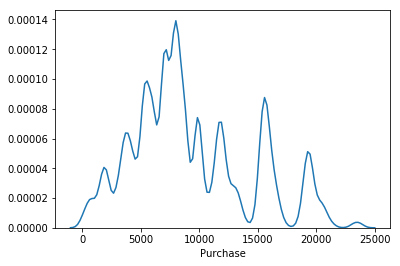

In [5]:
sns.distplot(train_df['Purchase'],hist=False)

In [6]:
print(train_df.shape,test_df.shape)

(550068, 12) (233599, 11)


In [7]:
df = pd.concat([train_df,test_df],axis=0)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
df.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [9]:
df['Product_Category_2']=df['Product_Category_2'].fillna(0)
df['Product_Category_3']=df['Product_Category_3'].fillna(0)

In [10]:
df=df.drop('User_ID',axis=1)
df=df.drop('Product_ID',axis=1)

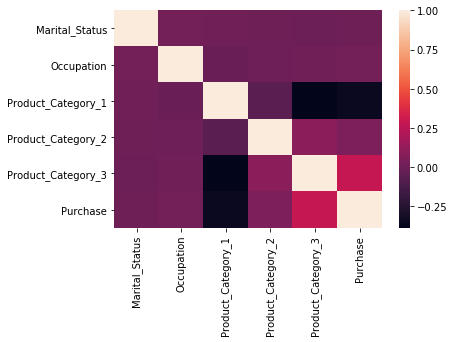

In [11]:
sns.heatmap(df.corr())

In [12]:
df['product_cateogry_4']=df['Product_Category_2']+df['Product_Category_3']

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


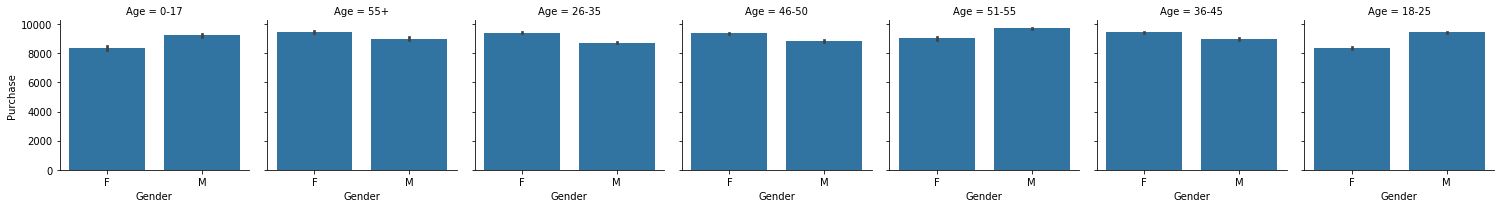

In [13]:
g = sns.FacetGrid(df,col="Age")
g.map(sns.barplot, "Gender", "Purchase");

In [14]:
df=pd.get_dummies(df)

In [15]:
df.shape

(783667, 24)

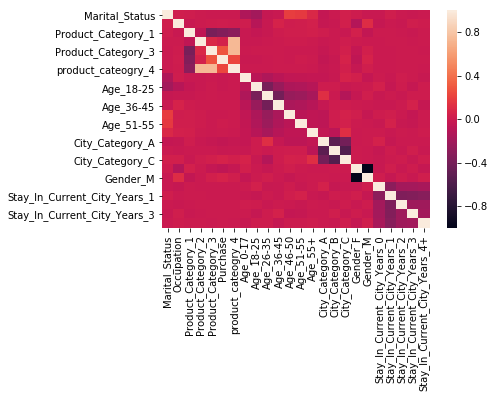

In [16]:
sns.heatmap(df.corr())

In [17]:
train_set=df.iloc[:550068,:]
test_set=df.iloc[550068:,:]

In [18]:
train_set.shape

(550068, 24)

In [19]:
test_set.shape

(233599, 24)

In [20]:
X_train=train_set.drop('Purchase',axis=1)
y_train=train_set['Purchase']
X_test=test_set.drop('Purchase',axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_1,X_2,y_1,y_2=train_test_split(X_train,y_train,test_size = 0.2, random_state = 0,shuffle=False)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
lr=LinearRegression()

In [23]:
pred=lr.fit(X_1,y_1).predict(X_2)

In [27]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_2,pred)))

4616.542840617351


In [28]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
pred1=DT.fit(X_1, y_1).predict(X_2)

In [29]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_2,pred1)))

2952.9507168109726


In [30]:
max_depth = [8,10,15,20,25]
min_samples_leaf=[50,75,100,125,150]
max_features = [1,0.8,0.7,0.6,0.5]
param_grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features)

In [35]:
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(
DecisionTreeRegressor(max_depth=15), n_estimators=150,
loss='linear', learning_rate=0.5
)
p=ada_clf.fit(X_1, y_1).predict(X_2)

In [36]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_2,p)))

3155.4118365200147
